In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
import os
import csv
from datetime import datetime, timedelta

In [2]:
def getList():
    path = os.getcwd()
    dateList = []
    pnlList = []
    lastDate = None
    lastPnl = 0
    for root, subdirs, files in os.walk(path):
        for fileName in files:
            if '.csv' in fileName:
                # 读取文件
                with open(fileName, 'r') as f:
                    reader = csv.DictReader(f)
                    for row in reader:
                        if row['累计盈亏']:
                            dateStr = row['时间']
                            try:
                                date = datetime.strptime(dateStr, '%Y-%m-%d %H:%M:%S')
                            except:
                                try:
                                    date = datetime.strptime(dateStr, '%Y-%m-%d %H:%M:%S.%f')
                                except:
                                    print '时间格式错误'
                            pnl = float(row['累计盈亏']) * 10
                            
                            if not len(dateList):
                                dateList.append(date - timedelta(1))
                                pnlList.append(0)
                            
                            if lastDate:
                                d = lastDate + timedelta(1)
                                while d.date() < date.date():
                                    dateList.append(d)
                                    pnlList.append(lastPnl)
                                    d += timedelta(1)
                            
                            dateList.append(date)
                            pnlList.append(pnl)
                            lastDate = date
                            lastPnl = pnl
                    return dateList, pnlList
    return dateList, pnlList

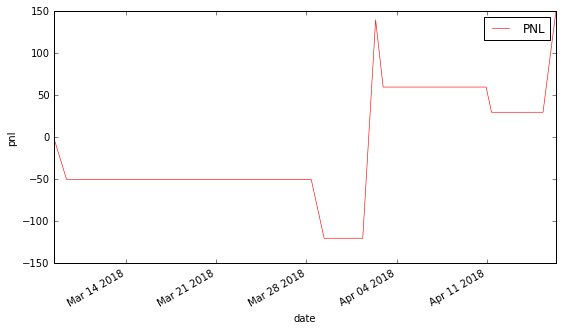

In [8]:
#绘图
def figure():
    dateList, pnlList = getList()
    df = DataFrame({'PNL':pnlList},
                   index = dateList)
    plt.rc('figure', figsize = (9, 5)) #全局配置matplot
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    df['PNL'].plot(ax = ax, linestyle = '-', linewidth = 0.6, color = 'r')
    #ax.set_title('simple') #图标的名称
    ax.set_xlabel('date') #x轴名称
    ax.set_ylabel('pnl') #y轴名称
    #ax.set_xticklabels(ax.get_xticklabels(), rotation = 60, fontsize = 8) #x轴刻度设置（旋转，字体）
    ax.legend(loc = 'best') #显示图例
    fig.savefig('result.png', dpi = 400, bbox_inches = 'tight') #保存回测结果图表
figure()